# Welcome to ASAPDiscovery

Welcome to the ASAPDiscovery tutorial series! 

This notebook will run you through some of the base level abstractions used in our workflows and get you comfortable with the style of the package! 

## Making your first Ligand

We aim to provide high-level abstractions that allow conceptual operations on common objects in drug discovery without worrying about implementation details.

Nothing could be more fundamental to drug discovery than a ligand so lets start there! `asapdiscovery` has a `Ligand` schema that acts as a metadata rich serializable wrapper around a small molecule (backed by an SDF string).  This is essential for allowing 

In [1]:
from asapdiscovery.data.schema.ligand import Ligand

# make a ligand from a SMILES string 

lig = Ligand.from_smiles("CC(Cc1ccc(cc1)C(C(=O)O)C)C", compound_name="ibuprofen") # compound name is mandatory 

In [2]:
# we can compute common properties of our ligand
print(lig.inchi)
print(lig.inchikey)
print(lig.num_poses)
print(lig.smiles)

InChI=1S/C13H18O2/c1-9(2)8-11-4-6-12(7-5-11)10(3)13(14)15/h4-7,9-10H,8H2,1-3H3,(H,14,15)
HEFNNWSXXWATRW-UHFFFAOYSA-N
1
CC(C)Cc1ccc(cc1)C(C)C(=O)O


In [3]:
# our representation is fully serialisable as JSON, backed by storing an SDF file
lig.json()

'{"compound_name": "ibuprofen", "ids": null, "provenance": {"isomeric_smiles": "CC(C)Cc1ccc(cc1)C(C)C(=O)O", "inchi": "InChI=1S/C13H18O2/c1-9(2)8-11-4-6-12(7-5-11)10(3)13(14)15/h4-7,9-10H,8H2,1-3H3,(H,14,15)", "inchi_key": "HEFNNWSXXWATRW-UHFFFAOYSA-N", "fixed_inchi": "InChI=1/C13H18O2/c1-9(2)8-11-4-6-12(7-5-11)10(3)13(14)15/h4-7,9-10H,8H2,1-3H3,(H,14,15)/f/h14H", "fixed_inchikey": "HEFNNWSXXWATRW-YHMJCDSINA-N"}, "experimental_data": null, "expansion_tag": null, "tags": {}, "conf_tags": {}, "data": "\\n  -OEChem-05072411412D\\n\\n 15 15  0     1  0  0  0  0  0999 V2000\\n    2.5966    0.4977    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    2.5994    1.4977    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    1.7349    2.0002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    0.8674    1.5027    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    0.8674    0.4976    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  

In [4]:
# serialize to JSON
lig.to_json_file("my_ligand.json")

In [5]:
# deserialize 
lig2 = Ligand.from_json_file("my_ligand.json")
# check for equality
lig == lig2

True

In [6]:
# you can save it as an SDF file 
lig.to_sdf("my_sdf.sdf")

These abstractions enable remote transmission of ligands, easy metadata tracking and simple equality testing between small molecules. All of our workflows make ample use of these abstractions to avoid extensive metadata interrogation at each step and allow easy flow through of identifiers. 

In [7]:
# we can also easily make OpenEye molecules from ligands to work with OpenEye components. 
oemol = lig.to_oemol()
oemol

<oechem.OEMol; proxy of <Swig Object of type 'OEMolWrapper *' at 0x76ec4b64f630> >

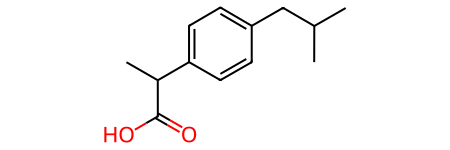

In [8]:
# we can also easily make RDKit molecules from ligands 
rdkit_mol = lig.to_rdkit()
rdkit_mol

These translations allow easy use with chemoinformatics,  structure based drug design toolkits and molecular simulation engines of all kinds.  

## Making your first Target

Most drug discovery campaigns need a target! So how does `asapdiscovery` handle these? A `Target` is a metadata rich serializable  wrapper around a PDB file in much the same way as a `Ligand`. 

For this example we will use an ASAP target, the SARS-CoV-2 nsp3 Mac1 macrodomain that  removes ADP ribose from viral and host cell proteins. The removal of this post-translational modification reduces the inflammatory and antiviral responses to infection — facilitating replication (see [here](https://www.mdpi.com/2076-0817/11/1/94) for review).

See [SARS-CoV-2 nsp3 Mac1 targeting opportunity](https://asapdiscovery.notion.site/Targeting-Opportunity-SARS-CoV-2-nsp3-Mac1-macrodomain-47af24638b994e8ba786303ec743926e) for more information on Mac1. 


**NOTE: A target is designed to wrap only the protein component of a PDB file.** To work with a protein-ligand complex, you should use a `Complex` object (see later). Making a `Target` will automatically remove the small molecule components from a PDB file. 


In [9]:
# first lets grab a file from the `asapdiscovery` test suite
from asapdiscovery.data.testing.test_resources import fetch_test_file

In [10]:
from asapdiscovery.data.schema.target import Target

In [11]:
protein = fetch_test_file("SARS2_Mac1A-A1013.pdb")
print(type(protein)) # its a path to a real file

<class 'pathlib.PosixPath'>


In [12]:
mac1_target = Target.from_pdb(protein, target_name="Mac1A")

In [13]:
# serialize to JSON
mac1_target.to_json_file("target.json")

In [14]:
# deserialize from JSON
t2 = Target.from_json_file("target.json")
t2 == mac1_target

True

In [15]:
# also to a PDB file, only protein components included
mac1_target.to_pdb("my_pdb.pdb")

## Making your first Complex

We have looked at `Targets` and `Ligands` now what about combining them? A complex is just that, a combination of a ligand and target object for easy handling of both small molecule and protein elements


In [16]:
from asapdiscovery.data.schema.complex import Complex

In [17]:
complx = Complex.from_pdb(protein, target_kwargs={"target_name": "Mac1A"}, ligand_kwargs={"compound_name": "A1013"})

In [18]:
complx.ligand

Ligand(compound_name='A1013', ids=None, provenance=LigandProvenance(isomeric_smiles='c1cc2c(cc1[C@@H](C(=O)[O-])Nc3c4cc[nH]c4ncn3)OCCO2', inchi='InChI=1S/C16H14N4O4/c21-16(22)13(9-1-2-11-12(7-9)24-6-5-23-11)20-15-10-3-4-17-14(10)18-8-19-15/h1-4,7-8,13H,5-6H2,(H,21,22)(H2,17,18,19,20)/p-1/t13-/m0/s1', inchi_key='FHHVXLFEHODNRQ-ZDUSSCGKSA-M', fixed_inchi='InChI=1/C16H14N4O4/c21-16(22)13(9-1-2-11-12(7-9)24-6-5-23-11)20-15-10-3-4-17-14(10)18-8-19-15/h1-4,7-8,13H,5-6H2,(H,21,22)(H2,17,18,19,20)/p-1/t13-/m0/s1/fC16H13N4O4/h17,20H/q-1', fixed_inchikey='FHHVXLFEHODNRQ-XCZWEQHLNA-M'), experimental_data=None, expansion_tag=None, tags={}, conf_tags={}, data_format=<DataStorageType.sdf: 'sdf'>)

In [19]:
complx.target

Target(target_name='Mac1A', ids=None, data_format=<DataStorageType.pdb: 'pdb'>)

In [20]:
# can be serialized as one file with JSON 
complx.to_json_file("my_complex.json")

In [21]:
c2 = Complex.from_json_file("my_complex.json")

In [22]:
c2 == complx

True

In [23]:
# you can make a combined OpenEye molecule easily
complx.to_combined_oemol()

<oechem.OEGraphMol; proxy of <Swig Object of type 'OEGraphMolWrapper *' at 0x76eda90706c0> >

In [24]:
# or save as a PDB file, protein and ligand included
complx.to_pdb("my_complex.pdb")

## Summary

Hopefully this has given you a nice introduction to the base level abstractions used by the `asapdiscovery` repo. Continue on to the next tutorials for more fun stuff. 